In [1]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import pandas as pd
import pickle
import skill_metrics as sm

In [2]:
greenbears = pd.read_csv('phenology-2021-03-08-greenbears_stl.csv')
PEG = pd.read_csv('preds.csv')
EDM = pd.read_csv('phenology-2021-03-08-UCSC_P_EDM.csv')
Obs = pd.read_csv('https://data.ecoforecast.org/targets/phenology/phenology-targets.csv.gz')

In [3]:
#Define a funtion to extract mean for specific site. 
def extract_site_mean(data, target):
    if 'statistic' in data.columns:
        data = data[(data['siteID']==target) & (data['statistic']=='mean')]
    else:
        data = data[(data['siteID']==target)]
    data = data.set_index("time")
    return data

In [4]:
#TODO: Wrtie a loop over all sites. 
#Extract mean for PEG_HARV 
PEG_HARV = extract_site_mean(PEG, 'HARV')
greenbears_HARV = extract_site_mean(greenbears, 'HARV')
EDM_HARV = extract_site_mean(EDM, 'HARV')
Obs_HARV = extract_site_mean(Obs, 'HARV').dropna()

In [5]:
#Calculate statistics for taylor diagram
n = len(greenbears_HARV) #Choose first 35 elements in preditions and the last 35 element in observation. 
PEG_taylor_stats = sm.taylor_statistics(PEG_HARV['gcc_90'][:n],Obs_HARV['gcc_90'][-n:])
greenbears_taylor_stats = sm.taylor_statistics(greenbears_HARV['gcc_90'][:n],Obs_HARV['gcc_90'][-n:])
EDM_taylor_stats = sm.taylor_statistics(EDM_HARV['gcc_90'][:n],Obs_HARV['gcc_90'][-n:])
Obs_taylor_stats = sm.taylor_statistics(Obs_HARV['gcc_90'][:n],Obs_HARV['gcc_90'][-n:])

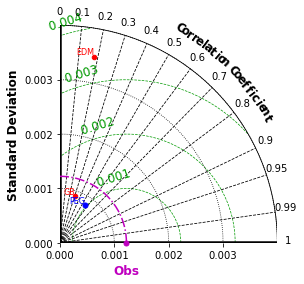

In [8]:
#Store statstics for Taylor Diagram for other teams/competitor
sdev = np.array([PEG_taylor_stats['sdev'][0],
                greenbears_taylor_stats['sdev'][1], 
                EDM_taylor_stats['sdev'][1]])

crmsd = np.array([PEG_taylor_stats['crmsd'][0], 
                greenbears_taylor_stats['crmsd'][1], 
                EDM_taylor_stats['crmsd'][1]])

ccoef = np.array([PEG_taylor_stats['ccoef'][0],
                greenbears_taylor_stats['ccoef'][1], 
                EDM_taylor_stats['ccoef'][1]])

#Set label for other teams. PEG will be added as a second layer later.
label = ['Obs', 'GB', 'EDM']  

#Draw Taylor Diagram for other teams 
sm.taylor_diagram(sdev, crmsd, ccoef, numberPanels = 1,
                  markerLabel = label, markerLabelColor = 'r', markerSize = 9, 
                titleRMS = 'off', widthRMS = 0.7,
                titleSTD='on', showlabelsSTD='on', widthSTD = 0.8,
                titleOBS = 'Obs', 
                  styleOBS = '-.', markerobs = 'o',
                colCOR = 'k', styleCOR = '--', widthCOR = 0.8)


#Store statstics for Taylor Diagram for PEG
sdev_PEG = np.array([PEG_taylor_stats['sdev'][0],
                PEG_taylor_stats['sdev'][1]])

crmsd_PEG = np.array([PEG_taylor_stats['crmsd'][0], 
                PEG_taylor_stats['crmsd'][1]])

ccoef_PEG = np.array([PEG_taylor_stats['ccoef'][0],
                PEG_taylor_stats['ccoef'][1]])
#Set Label 
label = ['Non-Dimensional Observation', 'PEG']

#Second layer for PEG. Comment in function: overlay = 'on'
sm.taylor_diagram(sdev_PEG,crmsd_PEG,ccoef_PEG, overlay = 'on',  titleSTD='on',
                      markerLabel = label, markerLabelColor = 'b',
                      markerColor = 'b')

#plt.savefig('taylor.png')

In [ ]:
PEG_HARV[:n] #PEG prediction for 3/25 - 4/28

In [ ]:
Obs_HARV[-n:] #Only have observation from 3/1 - 7/7 

In [ ]:
np.corrcoef(Obs_HARV['gcc_90'][-n:],PEG_HARV['gcc_90'][:n]) #use np to calculate ccoef between PEG and Obs 

In [ ]:
PEG_taylor_stats #

In [9]:
PEG_taylor_stats

{'ccoef': array([1.        , 0.55312501]),
 'crmsd': [0.0, 0.0010301266627790902],
 'sdev': [0.0012233148008754, 0.0008266849192821281]}